<a href="https://colab.research.google.com/github/prteek/IO/blob/master/intro_to_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning

## Types 
#### Supervised: 
Given a set of data the task is to learn the relationship between the input x and output y such that, when given a novel input x* the predicted y* is accurate. Accuracy is measure by some Loss function e.g. MSE (mean squared errors)
Regression (linear/logistic), SVM, K-nearest neighbours etc. 

#### Unsupervised:
Given a set of data we aim to find a plausible compact description of data. An objective is used to quantify tge accuracy of the description e.g. retained variance.
In essence we are interested in modelling the distribution of x.
Principal component analysis, K means clustering etc.

#### Anomaly Detection
#### Online (sequential) learning
#### Semi supervised learning
#### Self supervised learning (turing learning)

In [0]:
import os 
os.system('pip install -U -r requirements.txt')

import numpy as np
import matplotlib.pyplot as plt


## Generate data

In [0]:
np.random.seed(42)

x_lo = np.random.normal(15,3, (200,1))
y_lo = (x_lo**2)/2+1*x_lo + 1
x_hi = np.random.normal(25,3, (200,1))
y_hi = (x_hi**2)/2+x_hi*1.5+2
x    = np.append(x_lo, x_hi).reshape(-1,1)
y    = np.append(y_lo, y_hi).reshape(-1,1)
yn   = np.random.normal(3,5, (len(y),1)) + y

xu, i = np.unique(x, return_index=True)
yu    = yn[i]

xs = np.sort(xu)
i  = np.argsort(xu)
ys = yu[i]

x_partition = np.where(xs<20)[0][-1]

x_lo = xs[:x_partition]
y_lo = ys[:x_partition]
x_hi = xs[x_partition:]
y_hi = ys[x_partition:]


## Linear regression

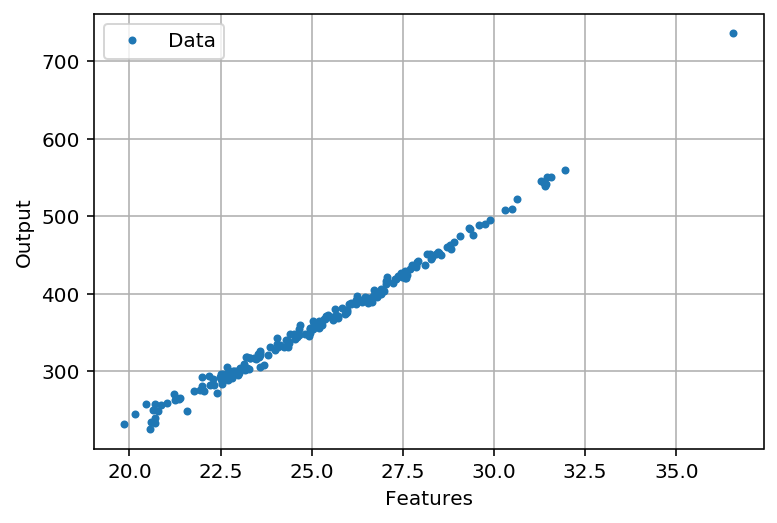

In [0]:
# plot to see linearity

plt.plot(x_hi, y_hi, '.', label='Data')
plt.xlabel('Features')
plt.ylabel('Output')
plt.legend()
plt.grid()


#### fit a polynomial y = theta_1*x + theta_2


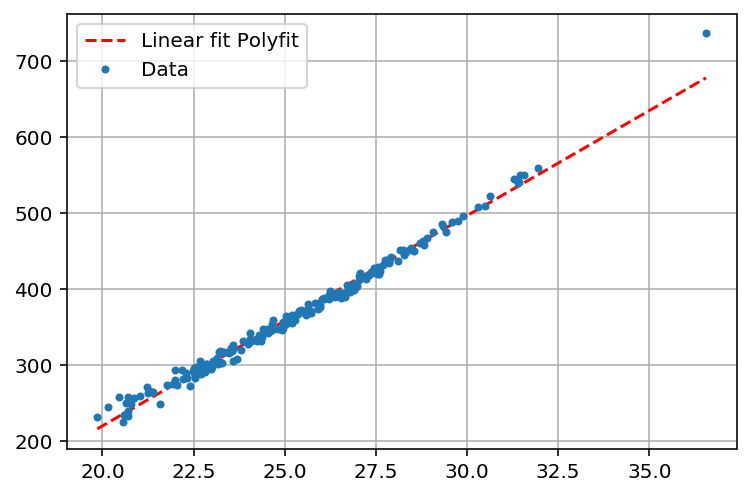

In [0]:
theta    = np.polyfit(x_hi, y_hi, 1);
x_input  = np.array([min(x_hi), max(x_hi)])
y_output = theta[0]*x_input + theta[1];
plt.plot(x_input, y_output,'--r', label='Linear fit Polyfit')
plt.plot(x_hi, y_hi, '.', label='Data')
plt.legend()
plt.grid()

#### Matrix inversion (The logic behind)  
Let's assume, <br/>

**[y] = [x, 1]*[theta_1, theta_2]'**

or 

**Y = X*THETA'**  remember X is [x, 1]

but, X is not a square matrix. In such situation mathematically we can only find pseudo-inverse.

**pseudo_inverse = inv(X*X')**, X*X' is a square symmetric matrix
or, pseudo_inverse = pinv(X)

so THETA' = pinv(X)*Y

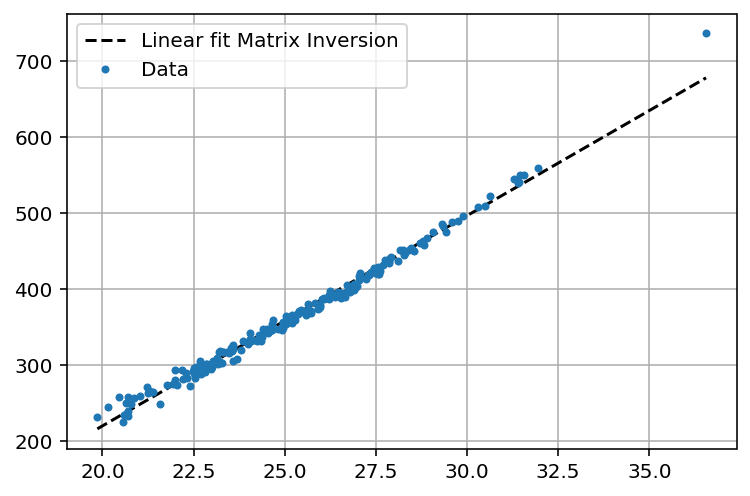

In [0]:
theta    = np.linalg.pinv(np.c_[x_hi, np.ones((len(x_hi),1))])@y_hi
y_output = np.c_[x_input, np.ones((len(x_input),1))]@theta
plt.plot(x_input, y_output,'--k', label='Linear fit Matrix Inversion')
plt.plot(x_hi, y_hi, '.', label='Data')
plt.grid()
plt.legend()
plt.show()


### Linear Parameter Model
Such models are also called linear parameter models. The key is model is linear in its parameters not necessarily in it's input vs output relationship.

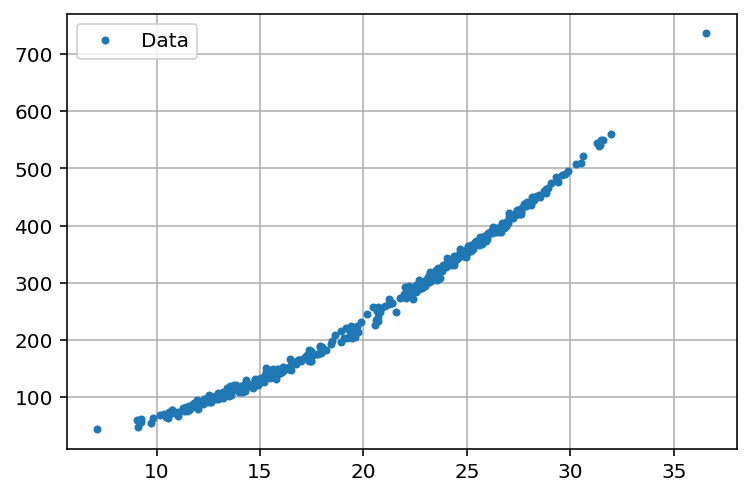

In [0]:
plt.plot(xs, ys, '.',label='Data')
plt.legend()
plt.grid()


Let's assume

**y = alpha_1*(x^alpha_2)**  

**log(y) = alpha_2 * log(x) + log(alpha_1)**  

or   **y_new   = theta_1 * x_new + theta_2**   

alternately **Y = X* THETA'  where Y = log(y)**, X is [log(x) 1]  

and we know that THETA' = pinv(X)*Y, Note numerical inversion methods ensure optimum fit in a way

__main__:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


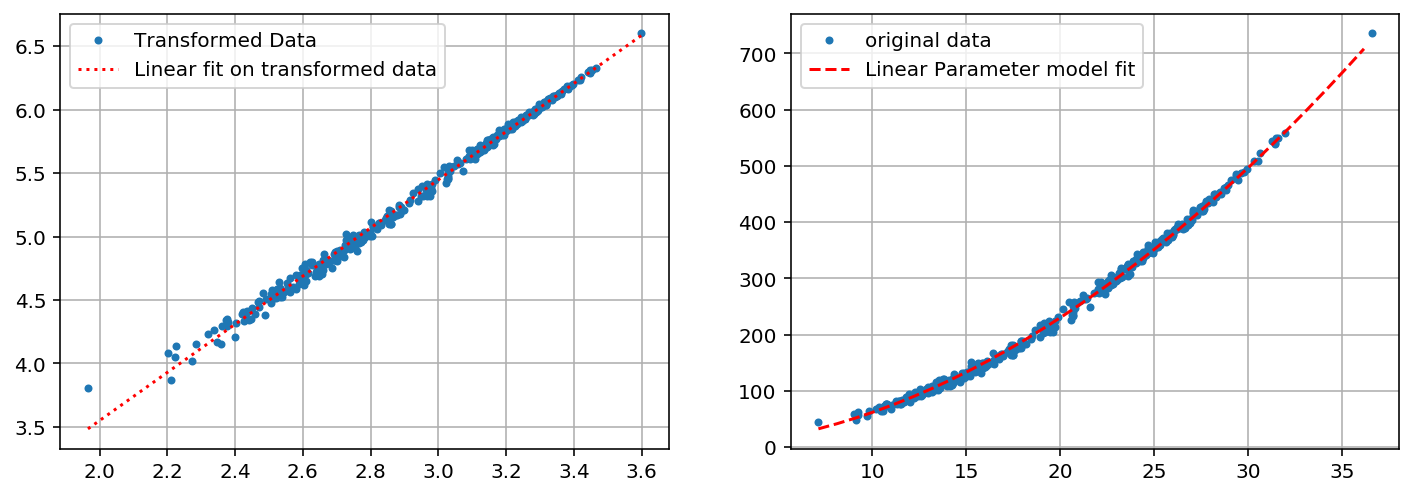

In [0]:
x_new = np.log(xs);
y_new = np.log(ys);
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(x_new, y_new, '.', label='Transformed Data')
plt.legend()
plt.grid()

theta_new = np.linalg.pinv(np.c_[x_new, np.ones((len(x_new),1))])@y_new

x_input  = np.array([min(x_new), max(x_new)])
y_output = np.c_[x_input, np.ones((len(x_input),1))]@theta_new
plt.subplot(1,2,1)
plt.plot(x_input, y_output, ':r',label='Linear fit on transformed data')
plt.legend()

# Or Alternatively
x_input  = np.arange(min(xs), max(xs))
y_output = np.exp(theta_new[1])*x_input**theta_new[0]
plt.subplot(1,2,2)
plt.plot(xs, ys, '.', label='original data')
plt.plot(x_input, y_output, '--r', label='Linear Parameter model fit')
plt.legend()
plt.grid()
plt.show()

#### Measure of Accuracy  

**R^2: Goodness of fit**

What % of variance in data is explained by the model
i.e. 100% - (Residual variance in the data)/(Variance of data)  
or **R^2 = 1 - [(y1* - y1)^2 + (y2*-y2)^2 + ...]/var(y)**

This means if R^2 is 0 then y cannot be explained by knowing x.

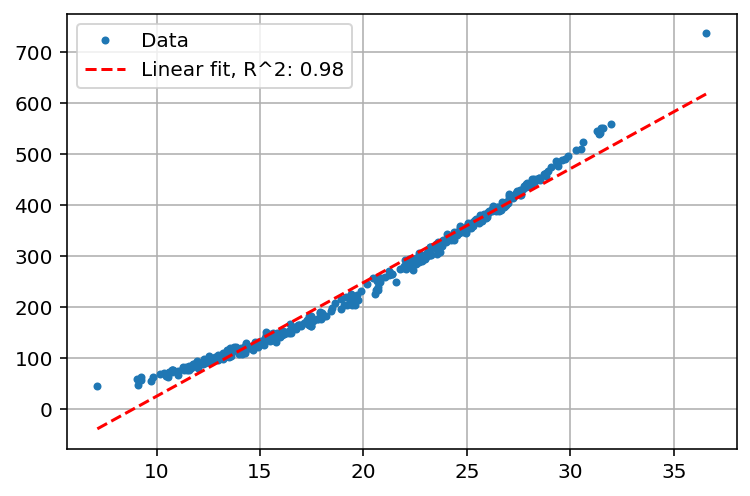

In [0]:
plt.plot(xs, ys, '.', label='Data')

theta = np.linalg.pinv(np.c_[xs, np.ones((len(xs),1))])@ys


model_error   = ys - np.c_[xs, np.ones((len(xs),1))]@theta
de_mean_ys    = ys - np.mean(ys);
r_squared     = np.round(1 - (np.sum(model_error**2)/np.sum(de_mean_ys**2)),2)

x_input  = np.array([min(xs), max(xs)])
y_output = np.c_[x_input, np.ones((len(x_input),1))]@theta
plt.plot(x_input, y_output, '--r',label=('Linear fit, R^2: ' + str(r_squared)))
plt.grid()
plt.legend()
plt.show()

## Bayesian Reasoning
The above approach to machine learning is empirical.
Bayesian reasoning dictates not to discard the prior knowledge available rather start from it. (especially useful for higher dimensional data and allows to make use of prior subject matter knowledge)

There are 2 main approaches using which parameters can be fit using Bayesian reasoning:  
* **Discriminative**: In essence we identify the boundary that separates classes or find the linear regression function.  
* **Generative**: In essence we start with how x itself is distributed for different classes in y  and build from there.

In [0]:
plt.hist(xs,20)
plt.plot([20, 20], [0 50], '--r')

# Knowing xs is distributed in a certain way we can fit different models to parts of xs. Here we divide xs < 20 and xs > 20 and corresponding ys

plt.plot(x_lo, y_lo, '.', label='Lo Data') 
plt.plot(x_hi, y_hi, '.', label='Hi Data')
plt.legend()

theta_lo = [pinv([x_lo, ones(length(x_lo),1)])*y_lo]';
theta_hi = [pinv([x_hi, ones(length(x_hi),1)])*y_hi]';

model_error_lo   = y_lo - [x_lo, ones(length(x_lo),1)]*theta_lo';
de_mean_y_lo     = y_lo - mean(y_lo);
r_squared_lo     = 1 - (model_error_lo'*model_error_lo/(de_mean_y_lo'*de_mean_y_lo))

model_error_hi   = y_hi - [x_hi, ones(length(x_hi),1)]*theta_hi';
de_mean_y_hi     = y_hi - mean(y_hi);
r_squared_hi     = 1 - (model_error_hi'*model_error_hi/(de_mean_y_hi'*de_mean_y_hi))

x_input  = [min(x_lo), max(x_lo)]';
y_output = [x_input, ones(length(x_input),1)]*theta_lo';
plot(x_input, y_output, 'r','DisplayName','Linear fit lo Data')
legend show

x_input  = [min(x_hi), max(x_hi)]';
y_output = [x_input, ones(length(x_input),1)]*theta_hi';
plot(x_input, y_output, 'b','DisplayName','Linear fit hi Data')
legend show

SyntaxError: invalid syntax (<ipython-input-9-319f6b12f763>, line 2)

Gradient Descent
The objective of linear regression is to minimize the cost function which is MSE (mean squared error). 
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^{2} $$

This is a convex function in , which is very good to achieve global minima.
m is number of examples (data points) and the hypothesis  is given by the linear model

$$ h_{\theta}(x) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1}  $$

The parameters of your model are the  values. These are the values you need to adjust to minimize cost . One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

With each step of gradient descent, your parameters  come closer to the optimal values (by step size ) that will achieve the lowest cost .
Also very important that x's and even y's are scaled to be between 0 and 1 for proper convergence

In [0]:
m = length(x_new); % number of training examples

X = [x_new, ones(length(x_new),1)]; 